<a href="https://colab.research.google.com/github/CristaldoWeint/A3---Cristaldo---An-lisis-de-sentimiento.ipynb/blob/main/A3_Cristaldo_An%C3%A1lisis_de_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EM72V -Inteligencia Artificial Generativa en Organizaciones

##Trabajo Práctico 3 - Analisis de Sentimientos


- Profesor: Rita Morrone

- Alumno: **Mauricio Cristaldo**

# Consigna

2.	Desarrolle un análisis de sentimiento
-	Arme un conjunto de comentarios (reseñas de clientes, comentarios de redes sociales, feedback de empleados)
-	Desarrolle en Python un análisis de sentimiento
-	Obtenga conclusiones


# Respuesta

## Problema a resolver:

La aseguradora necesita comprender el sentimiento general de sus clientes, empleados y usuarios en redes sociales para mejorar sus servicios, procesos internos y comunicación. Sin embargo, los comentarios están en español y presentan variabilidad lingüística, lo que dificulta aplicar modelos de análisis de sentimiento preentrenados en inglés




📊 **Variables**

- `id`:  identificador único

- `fuente`:  cliente / red_social / empleado

- `comentario`:  texto completo del comentario

- `fecha`:  fecha simulada del comentario

- `empresa`:  nombre ficticio de la aseguradora ("Seguros Río de Plata")

- `rating`:  puntuación de 1 a 5 (si aplica)


#1. Bibliotecas

In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Acceso a datasets desde Kaggle
import kagglehub

from transformers import pipeline

from googletrans import Translator # importamos el traductor de texto

from wordcloud import WordCloud
import random




---

#2. Obtencion de datos

---


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mauriciocristaldo/comentarios-industria-del-seguro")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'comentarios-industria-del-seguro' dataset.
Path to dataset files: /kaggle/input/comentarios-industria-del-seguro


In [ ]:
data = pd.read_csv(os.path.join(path, 'simulacion_comentarios.csv'), sep=',', encoding='utf-8', low_memory=False)
data

,id,fuente,comentario,fecha,empresa,rating
0,1,cliente,"Excelente atención post siniestro, resolvieron...",2025-09-12,Seguros Río de Plata,5.0
1,2,cliente,"Me subieron la cuota sin avisar, muy poco tran...",2025-08-30,Seguros Río de Plata,2.0
2,3,red_social,¿Alguien más tuvo problemas con el call center...,2025-10-01,Seguros Río de Plata,NaN
3,4,empleado,Buen ambiente laboral pero falta capacitación ...,2025-07-15,Seguros Río de Plata,NaN
4,5,cliente,Contraté el seguro de hogar y me cobraron dobl...,2025-06-20,Seguros Río de Plata,1.0
5,6,red_social,"La app de la aseguradora mejoró mucho, ahora p...",2025-09-05,Seguros Río de Plata,NaN
6,7,empleado,"Procesos lentos y poco digitalizados, pero el ...",2025-08-10,Seguros Río de Plata,NaN
7,8,cliente,Muy buena cobertura médica en el interior del ...,2025-07-28,Seguros Río de Plata,4.0
8,9,red_social,No entiendo por qué tardan tanto en autorizar ...,2025-10-10,Seguros Río de Plata,NaN
9,10,cliente,"Me cancelaron la póliza sin explicación, pésim...",2025-06-05,Seguros Río de Plata,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30 non-null     int64  
 1   fuente      30 non-null     object 
 2   comentario  30 non-null     object 
 3   fecha       30 non-null     object 
 4   empresa     30 non-null     object 
 5   rating      14 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.5+ KB


---

#3. Nubes de palabras

---



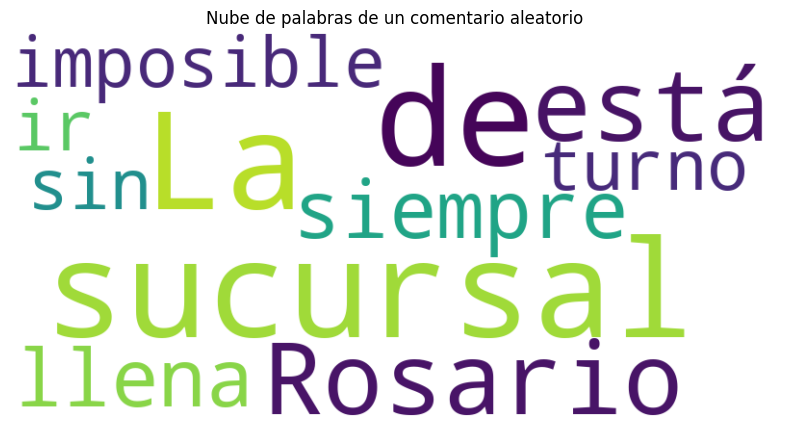

Comentario seleccionado:
 La sucursal de Rosario está siempre llena, imposible ir sin turno.


In [ ]:
#Dejamos una base original
df= data.copy()

# Fijar la semilla para reproducibilidad
random.seed(42)

# Seleccionar un comentario al azar (solo los que tienen texto no nulo)
comentario = df['comentario'].dropna().sample(1, random_state=42).values[0]

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comentario)

# Graficar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de un comentario aleatorio')
plt.show()

print("Comentario seleccionado:\n", comentario)


Se visualiza la importancia local y la atencion personal como critica.



---


#4. **Análisis de sentimiento**

---



Intentando cargar el modelo BERT: distilbert-base-uncased-finetuned-sst-2-english...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Modelo cargado correctamente.

--- Resumen de Sentimientos ---
                                          comentario sentimiento  confianza
0  Excelente atención post siniestro, resolvieron...    POSITIVE   0.999453
1  Me subieron la cuota sin avisar, muy poco tran...    NEGATIVE   0.995146
2  ¿Alguien más tuvo problemas con el call center...    NEGATIVE   0.999494
3  Buen ambiente laboral pero falta capacitación ...    NEGATIVE   0.919622
4  Contraté el seguro de hogar y me cobraron dobl...    POSITIVE   0.590706


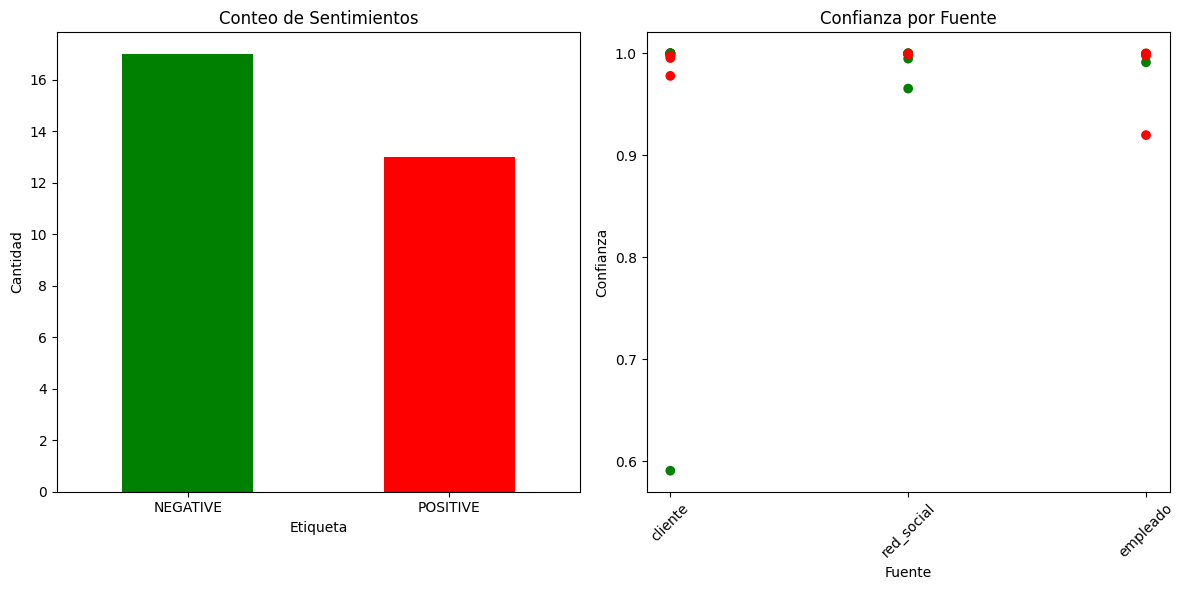

In [ ]:
# --- Cargar modelo BERT pre-entrenado ---
sentiment_pipeline = None
model_name_to_load = "distilbert-base-uncased-finetuned-sst-2-english"

try:
    print(f"Intentando cargar el modelo BERT: {model_name_to_load}...")
    sentiment_pipeline = pipeline("sentiment-analysis", model=model_name_to_load)
    print("Modelo cargado correctamente.")
except Exception as e:
    print(f"Error al cargar el modelo BERT: {e}")

# --- Instanciar traductor ---
translator = Translator()

def analyze_sentiment_bert(text):
    if sentiment_pipeline is None:
        return "ERROR_MODEL_NOT_LOADED", 0.0
    try:
        translated_text = translator.translate(text, dest='en').text
    except Exception as e:
        return "ERROR_TRANSLATION_FAILED", 0.0
    result = sentiment_pipeline(translated_text)[0]
    return result['label'], result['score']

# --- Cargar tu DataFrame de comentarios ---
# df = pd.read_csv("comentarios_seguros.csv")  # si lo tenés en archivo
# O si ya lo tenés cargado, seguimos directo

# --- Aplicar análisis de sentimiento a cada comentario ---
resultados = []

for idx, row in df.iterrows():
    texto = row['comentario']
    fuente = row['fuente']
    fecha = row['fecha']
    empresa = row['empresa']

    label, score = analyze_sentiment_bert(texto)

    resultados.append({
        'id': idx,
        'comentario': texto,
        'fuente': fuente,
        'fecha': fecha,
        'empresa': empresa,
        'sentimiento': label,
        'confianza': score
    })

# --- Crear nuevo DataFrame con resultados ---
sentiment_df = pd.DataFrame(resultados)

# --- Mostrar resumen ---
print("\n--- Resumen de Sentimientos ---")
print(sentiment_df[['comentario', 'sentimiento', 'confianza']].head())

# --- Visualización ---
plt.figure(figsize=(12, 6))

# Conteo de etiquetas
plt.subplot(1, 2, 1)
sentiment_df['sentimiento'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Conteo de Sentimientos')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

# Confianza por fuente
plt.subplot(1, 2, 2)
colors = sentiment_df['sentimiento'].apply(lambda x: 'green' if x == 'POSITIVE' else ('red' if x == 'NEGATIVE' else 'blue'))
plt.scatter(sentiment_df['fuente'], sentiment_df['confianza'], c=colors)
plt.title('Confianza por Fuente')
plt.xlabel('Fuente')
plt.ylabel('Confianza')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Resultados obtenidos
- El modelo clasificó los comentarios en categorías POSITIVO y NEGATIVO, con niveles de confianza generalmente superiores al 90%.
- Se observó una polarización clara: los comentarios negativos fueron más frecuentes, especialmente entre clientes y redes sociales.
- La visualización permitió identificar fuentes con mayor carga emocional y evaluar la confiabilidad del modelo por tipo de comentario
